In [1]:
import tensorflow as tf
from tensorflow import keras

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [2]:
# Preprocess the data: Reshape images
# Images are 28x28 grayscale, so we add a channel dimension of 1
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(f"Shape of x_train after reshaping: {x_train.shape}")
print(f"Shape of x_test after reshaping: {x_test.shape}")

Shape of x_train after reshaping: (60000, 28, 28, 1)
Shape of x_test after reshaping: (10000, 28, 28, 1)


In [3]:
# Preprocess the data: Normalize pixel values
# Convert pixel values from [0, 255] to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print(f"Min pixel value in x_train after normalization: {x_train.min()}")
print(f"Max pixel value in x_train after normalization: {x_train.max()}")

Min pixel value in x_train after normalization: 0.0
Max pixel value in x_train after normalization: 1.0


In [4]:
# Preprocess the data: One-hot encode labels
# Convert integer labels to one-hot encoded vectors
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

print(f"Shape of y_train after one-hot encoding: {y_train.shape}")
print(f"Shape of y_test after one-hot encoding: {y_test.shape}")
print(f"Example of one-hot encoded label (first training label): {y_train[0]}")

Shape of y_train after one-hot encoding: (60000, 10)
Shape of y_test after one-hot encoding: (10000, 10)
Example of one-hot encoded label (first training label): [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [5]:
# Define the Neural Network Model
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28, 28, 1)), # Input layer: Flattens 28x28x1 images to a 784-element vector
    Dense(8, activation='relu'),   # Hidden layer: 32 neurons with ReLU activation
    Dense(10, activation='softmax')  # Output layer: 10 neurons (for 10 classes) with Softmax activation
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 8)                 6280      
                                                                 
 dense_1 (Dense)             (None, 10)                90        
                                                                 
Total params: 6370 (24.88 KB)
Trainable params: 6370 (24.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("Model compiled successfully with Adam optimizer, Categorical Crossentropy loss, and Accuracy metric.")


Model compiled successfully with Adam optimizer, Categorical Crossentropy loss, and Accuracy metric.


In [7]:
# Train the Model
print("\nStarting model training...")
history = model.fit(
    x_train, y_train,
    epochs=10,        # Number of times to iterate over the entire training dataset
    batch_size=256,   # Number of samples per gradient update
    validation_data=(x_test, y_test) # Data to evaluate the loss and metrics on at the end of each epoch
)

print("\nModel training completed.")


Starting model training...
Epoch 1/10


235/235 [==============================] - 1s 2ms/step - loss: 1.1253 - accuracy: 0.6677 - val_loss: 0.5332 - val_accuracy: 0.8645
Epoch 2/10
235/235 [==============================] - 0s 1ms/step - loss: 0.4686 - accuracy: 0.8752 - val_loss: 0.3948 - val_accuracy: 0.8922
Epoch 3/10
235/235 [==============================] - 0s 1ms/step - loss: 0.3884 - accuracy: 0.8936 - val_loss: 0.3515 - val_accuracy: 0.9033
Epoch 4/10
235/235 [==============================] - 0s 1ms/step - loss: 0.3542 - accuracy: 0.9012 - val_loss: 0.3288 - val_accuracy: 0.9094
Epoch 5/10
235/235 [==============================] - 0s 1ms/step - loss: 0.3322 - accuracy: 0.9072 - val_loss: 0.3148 - val_accuracy: 0.9127
Epoch 6/10
235/235 [==============================] - 0s 1ms/step - loss: 0.3188 - accuracy: 0.9108 - val_loss: 0.3013 - val_accuracy: 0.9166
Epoch 7/10
235/235 [==============================] - 0s 1ms/step - loss: 0.3073 - accuracy: 0.9142 - val_loss: 0.2951


Evaluating model on test data...
Test Loss: 0.2817
Test Accuracy: 0.9223

Making predictions on a few test images...
1/1 [==============================] - 0s 56ms/step


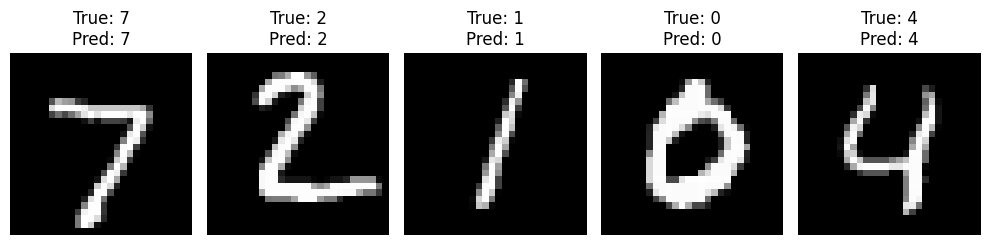


Inference test completed. Predicted vs. True labels for 5 samples displayed.


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Evaluate the model on the test data
print("\nEvaluating model on test data...")
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predict a few test images
print("\nMaking predictions on a few test images...")
predictions = model.predict(x_test[:5]) # Predict on the first 5 test images

# Display images and predictions
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {np.argmax(y_test[i])}\nPred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

print("\nInference test completed. Predicted vs. True labels for 5 samples displayed.")

In [9]:
import os

# Calculate model memory footprint
# Save the model to a temporary file to get its size on disk
model_filename = "mnist_baseline_model.h5"
model.save(model_filename)
model_size_bytes = os.path.getsize(model_filename)
model_size_kb = model_size_bytes / 1024
model_size_mb = model_size_kb / 1024

print(f"\nModel File Size: {model_size_bytes} bytes ({model_size_kb:.2f} KB, {model_size_mb:.2f} MB)")

# To remove the temporary file after checking its size
os.remove(model_filename)

# Estimate memory for inference (weights and activations)
# Parameters (weights and biases) are already calculated in model.summary()
total_params = model.count_params()
# Assuming float32 (4 bytes per parameter)
weights_memory_bytes = total_params * 4
weights_memory_kb = weights_memory_bytes / 1024
weights_memory_mb = weights_memory_kb / 1024

print(f"Total Model Parameters: {total_params}")
print(f"Estimated Memory for Weights (float32): {weights_memory_bytes} bytes ({weights_memory_kb:.2f} KB, {weights_memory_mb:.2f} MB)")

# Estimating activation memory for a single inference:
# Input layer: 28*28*1 * 4 bytes/pixel (float32)
# Flatten layer output: 784 * 4 bytes
# Dense layer 1 output: 128 * 4 bytes
# Dense layer 2 output: 10 * 4 bytes
input_mem = 28 * 28 * 1 * 4
flatten_output_mem = 784 * 4
dense1_output_mem = 128 * 4
dense2_output_mem = 10 * 4
total_activation_mem_single_inference = input_mem + flatten_output_mem + dense1_output_mem + dense2_output_mem

print(f"Estimated Peak Activation Memory for single inference: {total_activation_mem_single_inference} bytes ({total_activation_mem_single_inference / 1024:.2f} KB)")


Model File Size: 102336 bytes (99.94 KB, 0.10 MB)
Total Model Parameters: 6370
Estimated Memory for Weights (float32): 25480 bytes (24.88 KB, 0.02 MB)
Estimated Peak Activation Memory for single inference: 6824 bytes (6.66 KB)


c:\Users\shwet\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
import os

# Calculate model memory footprint
# Save the model to a temporary file to get its size on disk
model_filename = "mnist_baseline_model.h5"
model.save(model_filename)
model_size_bytes = os.path.getsize(model_filename)
model_size_kb = model_size_bytes / 1024
model_size_mb = model_size_kb / 1024

print(f"\nModel File Size: {model_size_bytes} bytes ({model_size_kb:.2f} KB, {model_size_mb:.2f} MB)")

# To remove the temporary file after checking its size
os.remove(model_filename)

# Convert the Keras model to a TensorFlow Lite model with full integer quantization

# Re-save the model in the native Keras format (recommended by TensorFlow warning)
keras_model_path = "mnist_baseline_model.keras"
model.save(keras_model_path)
print(f"\nKeras model saved to {keras_model_path}")

# Load the model from the native Keras format for conversion
loaded_model = keras.models.load_model(keras_model_path)

# Create a TensorFlow Lite converter
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)

# Enable full integer quantization
# This will quantize weights and activations to int8.
# It requires a representative dataset for calibration to determine min/max ranges for activations.
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]

# Provide a representative dataset for calibration
# The representative dataset should consist of a small subset of your training data.
# TFLite uses this to calibrate the dynamic ranges for activations.
def representative_data_gen():
    for input_value in x_train: # Using x_train, which is already normalized and reshaped
        yield [input_value]

converter.representative_dataset = representative_data_gen

# Ensure that input and output tensors are also quantized to int8
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8

# Convert the model
tflite_model_quant = converter.convert()

# Save the quantized TFLite model
tflite_model_quant_filename = "mnist_quantized_model.tflite"
with open(tflite_model_quant_filename, "wb") as f:
    f.write(tflite_model_quant)

print(f"\nQuantized TFLite model saved to {tflite_model_quant_filename}")

# Optional: Check the size of the quantized model
tflite_model_quant_size_bytes = os.path.getsize(tflite_model_quant_filename)
tflite_model_quant_size_kb = tflite_model_quant_size_bytes / 1024
print(f"Quantized TFLite Model Size: {tflite_model_quant_size_bytes} bytes ({tflite_model_quant_size_kb:.2f} KB)")

# Clean up the temporary .keras file
os.remove(keras_model_path)
print(f"Cleaned up temporary Keras model file: {keras_model_path}")


Model File Size: 102336 bytes (99.94 KB, 0.10 MB)

Keras model saved to mnist_baseline_model.keras
INFO:tensorflow:Assets written to: C:\Users\shwet\AppData\Local\Temp\tmpm76x_1c3\assets


INFO:tensorflow:Assets written to: C:\Users\shwet\AppData\Local\Temp\tmpm76x_1c3\assets
c:\Users\shwet\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\lite\python\convert.py:953: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(



Quantized TFLite model saved to mnist_quantized_model.tflite
Quantized TFLite Model Size: 8736 bytes (8.53 KB)
Cleaned up temporary Keras model file: mnist_baseline_model.keras


In [11]:
# Generate a .h file for the quantized TFLite model

import os

tflite_model_quant_filename = "mnist_quantized_model.tflite"
c_model_filename = "mnist_model_data.h"

# Read the TFLite model file as bytes
with open(tflite_model_quant_filename, "rb") as f:
    tflite_model_bytes = f.read()

# Convert bytes to a C-style array declaration
# Format: const unsigned char model_name[] = { 0x.., 0x.., ... };
bytes_as_hex = [f"0x{byte:02x}" for byte in tflite_model_bytes]
c_array_declaration = f"const unsigned char {os.path.basename(tflite_model_quant_filename).replace('.', '_')}_data[] = {{\n    "
c_array_declaration += ", ".join(bytes_as_hex)
c_array_declaration += "\n};\n"
c_array_declaration += f"const int {os.path.basename(tflite_model_quant_filename).replace('.', '_')}_len = {len(tflite_model_bytes)};\n"

# Write the C array declaration to the .h file
with open(c_model_filename, "w") as f:
    f.write("#ifndef MNIST_MODEL_DATA_H_\n")
    f.write("#define MNIST_MODEL_DATA_H_\n\n")
    f.write(c_array_declaration)
    f.write("\n#endif // MNIST_MODEL_DATA_H_\n")

print(f"\nC header file generated: {c_model_filename}")
print(f"This file contains the quantized model as a byte array, ready for embedded C inclusion.")


C header file generated: mnist_model_data.h
This file contains the quantized model as a byte array, ready for embedded C inclusion.


In [14]:
import tensorflow as tf
import numpy as np
import os

# --- Configuration ---
# Path to your quantized TFLite model generated by mnist_baseline_model.ipynb
TFLITE_MODEL_PATH = "mnist_quantized_model.tflite"

# Output C header and source files
C_HEADER_FILE = "mnist_model_params.h"
C_SOURCE_FILE = "mnist_model_params.c"

# --- Helper function for quantization of input data ---
def quantize_input(image_data_float32, scale, zero_point):
    """
    Quantizes float32 input data to int8 using the given scale and zero_point.
    Formula: Q = round(R / S + Z)
    """
    quantized_data = np.round(image_data_float32 / scale + zero_point)
    # Clip to int8 range [-128, 127]
    quantized_data = np.clip(quantized_data, -128, 127).astype(np.int8)
    return quantized_data

# --- Main generation function ---
def generate_c_arrays_from_tflite(model_path, header_file, source_file):
    print(f"Loading TFLite model from: {model_path}")
    interpreter = tf.lite.Interpreter(model_path=model_path)
    interpreter.allocate_tensors()

    # Get model details
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    tensor_details = interpreter.get_tensor_details()

    # Get operator details. This method is usually reliable.
    # The structure of elements in this list can vary by TF Lite version.
    # Each element is a dictionary representing an operator.
    ops_details_raw = interpreter._get_ops_details()

    # Open header and source files
    with open(header_file, "w") as hf, open(source_file, "w") as sf:
        hf.write("/*\n")
        hf.write(" * This file is auto-generated by generate_c_model_params.py.\n")
        hf.write(" * Do not modify manually.\n")
        hf.write(" */\n")
        hf.write("#ifndef MNIST_MODEL_PARAMS_H\n")
        hf.write("#define MNIST_MODEL_PARAMS_H\n\n")
        hf.write("#include <stdint.h>\n\n")

        sf.write("/*\n")
        sf.write(" * This file is auto-generated by generate_c_model_params.py.\n")
        sf.write(" * Do not modify manually.\n")
        sf.write(" */\n")
        sf.write("#include \"mnist_model_params.h\"\n\n")

        # Define MAX_N_ACTIVATIONS based on the model's input size (28*28 for MNIST)
        hf.write(f"#define MAX_N_ACTIVATIONS {input_details[0]['shape'][1] * input_details[0]['shape'][2]}\n\n")

        layer_idx = 1
        for op_detail in ops_details_raw:
            # Safely get operator name and builtin code
            current_op_name = op_detail.get('op_name')
            current_builtin_code = op_detail.get('builtin_code')

            print(f"Inspecting operator: op_name={current_op_name}, builtin_code={current_builtin_code}, inputs={op_detail.get('inputs')}, outputs={op_detail.get('outputs')}")

            # Check if it's a FULLY_CONNECTED layer
            # BuiltinOperator.FULLY_CONNECTED typically has builtin_code 9
            # or op_name 'FULLY_CONNECTED'
            is_fully_connected = False
            if current_op_name == 'FULLY_CONNECTED':
                is_fully_connected = True
            elif current_builtin_code == 9: # Known builtin_code for FULLY_CONNECTED
                is_fully_connected = True

            if is_fully_connected:
                print(f"Processing FULLY_CONNECTED layer {layer_idx}...")

                # Input, Weights, Bias tensors are identified by their indices in op_detail['inputs']
                # TFLite FULLY_CONNECTED op inputs: [input_tensor, weights_tensor, bias_tensor (optional)]
                input_tensor_idx = op_detail['inputs'][0]
                weights_tensor_idx = op_detail['inputs'][1]
                biases_tensor_idx = op_detail['inputs'][2] if len(op_detail['inputs']) > 2 else -1
                output_tensor_idx = op_detail['outputs'][0]

                # Find the corresponding tensor details
                input_tensor = next(t for t in tensor_details if t['index'] == input_tensor_idx)
                weights_tensor = next(t for t in tensor_details if t['index'] == weights_tensor_idx)
                output_tensor = next(t for t in tensor_details if t['index'] == output_tensor_idx)

                # Extract actual data
                weights_data = interpreter.tensor(weights_tensor_idx)()
                biases_data = interpreter.tensor(biases_tensor_idx)() if biases_tensor_idx != -1 else None

                # Extract quantization parameters
                # Use .get() and check for empty lists to prevent IndexError
                input_scale = input_tensor['quantization_parameters'].get('scales', [1.0])[0]
                input_zero_point = input_tensor['quantization_parameters'].get('zero_points', [0])[0]
                output_scale = output_tensor['quantization_parameters'].get('scales', [1.0])[0]
                output_zero_point = output_tensor['quantization_parameters'].get('zero_points', [0])[0]
                weights_scale = weights_tensor['quantization_parameters'].get('scales', [1.0])[0]
                weights_zero_point = weights_tensor['quantization_parameters'].get('zero_points', [0])[0]

                # Determine incoming and outgoing weights (dimensions)
                incoming_weights = weights_tensor['shape'][1]
                outgoing_weights = weights_tensor['shape'][0]

                # Pack 8-bit weights into uint32_t. Each uint32_t holds 4 int8 weights.
                packed_weights = []
                flat_weights = weights_data.flatten()
                # Pad with zeros if not a multiple of 4
                if len(flat_weights) % 4 != 0:
                    flat_weights = np.pad(flat_weights, (0, 4 - (len(flat_weights) % 4)), 'constant', constant_values=0)

                for i in range(0, len(flat_weights), 4):
                    val = 0
                    for j in range(4):
                        # Convert int8 to unsigned byte for packing, then shift
                        # Ensure the value is treated as unsigned before shifting for packing
                        val |= (np.uint32(flat_weights[i+j].astype(np.uint8)) << (24 - j*8))
                    packed_weights.append(f"0x{val:08X}")

                # Biases are typically int32 for quantized models
                biases_hex = [f"{b}" for b in biases_data] if biases_data is not None else [] # Use decimal for int32_t

                # Write declarations to header
                hf.write(f"// Layer {layer_idx} Parameters\n")
                hf.write(f"extern const uint32_t L{layer_idx}_weights[{len(packed_weights)}];\n")
                if biases_data is not None:
                    hf.write(f"extern const int32_t L{layer_idx}_biases[{len(biases_hex)}];\n")
                hf.write(f"extern const int32_t L{layer_idx}_bitperweight;\n")
                hf.write(f"extern const uint32_t L{layer_idx}_incoming_weights;\n")
                hf.write(f"extern const uint32_t L{layer_idx}_outgoing_weights;\n")
                hf.write(f"extern const float L{layer_idx}_input_scale;\n")
                hf.write(f"extern const int32_t L{layer_idx}_input_zero_point;\n")
                hf.write(f"extern const float L{layer_idx}_output_scale;\n")
                hf.write(f"extern const int32_t L{layer_idx}_output_zero_point;\n")
                hf.write(f"extern const float L{layer_idx}_weights_scale;\n")
                hf.write(f"extern const int32_t L{layer_idx}_weights_zero_point;\n\n")

                # Write definitions to source file
                sf.write(f"// Layer {layer_idx} Parameters\n")
                sf.write(f"const uint32_t L{layer_idx}_weights[{len(packed_weights)}] = {{\n    {', '.join(packed_weights)}\n}};\n")
                if biases_data is not None:
                    sf.write(f"const int32_t L{layer_idx}_biases[{len(biases_hex)}] = {{\n    {', '.join(biases_hex)}\n}};\n")
                sf.write(f"const int32_t L{layer_idx}_bitperweight = 8 + 8;\n") # Hardcoding to 8+8 for TFLite int8
                sf.write(f"const uint32_t L{layer_idx}_incoming_weights = {incoming_weights};\n")
                sf.write(f"const uint32_t L{layer_idx}_outgoing_weights = {outgoing_weights};\n")
                sf.write(f"const float L{layer_idx}_input_scale = {input_scale:.8f}f;\n")
                sf.write(f"const int32_t L{layer_idx}_input_zero_point = {input_zero_point};\n")
                sf.write(f"const float L{layer_idx}_output_scale = {output_scale:.8f}f;\n")
                sf.write(f"const int32_t L{layer_idx}_output_zero_point = {output_zero_point};\n")
                sf.write(f"const float L{layer_idx}_weights_scale = {weights_scale:.8f}f;\n")
                sf.write(f"const int32_t L{layer_idx}_weights_zero_point = {weights_zero_point};\n\n")

                layer_idx += 1

        # Generate quantized sample inputs and labels
        print("Generating quantized sample inputs and labels...")
        # Load original MNIST test data (from Keras/TensorFlow) for true input images
        (_, _), (x_test_raw, y_test_raw) = tf.keras.datasets.mnist.load_data()

        # Preprocess as done in the notebook: normalize to [0, 1] then flatten
        x_test_processed = x_test_raw.reshape(-1, 28, 28, 1).astype("float32") / 255.0

        # Get input quantization parameters from the *quantized model's* input tensor
        # This is the input tensor of the *first* layer in the TFLite model
        model_input_details = interpreter.get_input_details()[0]
        model_input_scale = model_input_details['quantization_parameters'].get('scales', [1.0])[0]
        model_input_zero_point = model_input_details['quantization_parameters'].get('zero_points', [0])[0]

        num_samples_to_generate = 4 # As used in main.c
        hf.write("// Quantized sample input images and their labels\n")
        sf.write("// Quantized sample input images and their labels\n")

        for i in range(num_samples_to_generate):
            # Flatten the preprocessed float32 image
            original_image_float = x_test_processed[i].flatten() # This will be 784 elements

            # Quantize
            quantized_image_int8 = quantize_input(original_image_float, model_input_scale, model_input_zero_point)

            label = y_test_raw[i]

            # Format for C array
            image_c_array_content = ', '.join([f"{val}" for val in quantized_image_int8])

            hf.write(f"extern const int8_t input_data_{i}[{len(quantized_image_int8)}];\n")
            hf.write(f"extern const uint8_t label_{i};\n")
            sf.write(f"const int8_t input_data_{i}[{len(quantized_image_int8)}] = {{\n    {image_c_array_content}\n}};\n")
            sf.write(f"const uint8_t label_{i} = {label};\n")

        hf.write("\n#endif // MNIST_MODEL_PARAMS_H\n")

    print(f"Generated {header_file} and {source_file} with model parameters and sample inputs.")

# --- Script execution ---
if __name__ == "__main__":
    if not os.path.exists(TFLITE_MODEL_PATH):
        print(f"Error: Quantized TFLite model not found at {TFLITE_MODEL_PATH}.")
        print("Please ensure you have run the `mnist_baseline_model.ipynb` notebook")
        print("to generate `mnist_quantized_model.tflite` before running this script.")
    else:
        generate_c_arrays_from_tflite(TFLITE_MODEL_PATH, C_HEADER_FILE, C_SOURCE_FILE)

Loading TFLite model from: mnist_quantized_model.tflite
Inspecting operator: op_name=RESHAPE, builtin_code=None, inputs=[0 1], outputs=[6]
Inspecting operator: op_name=FULLY_CONNECTED, builtin_code=None, inputs=[6 5 4], outputs=[7]
Processing FULLY_CONNECTED layer 1...
Inspecting operator: op_name=FULLY_CONNECTED, builtin_code=None, inputs=[7 3 2], outputs=[8]
Processing FULLY_CONNECTED layer 2...
Inspecting operator: op_name=SOFTMAX, builtin_code=None, inputs=[8], outputs=[9]
Inspecting operator: op_name=DELEGATE, builtin_code=None, inputs=[0 1 2 3 4 5], outputs=[8]
Generating quantized sample inputs and labels...
Generated mnist_model_params.h and mnist_model_params.c with model parameters and sample inputs.
Generated mnist_model_params.h and mnist_model_params.c with model parameters and sample inputs.
